In [15]:
import glob
import velocyto as vcy
from sklearn.manifold import TSNE
import numpy as np

loom_files = glob.glob("*/velocyto/*.loom")
loom_files

['mWT/velocyto/mWT.loom', 'mNFIXko/velocyto/mNFIXko.loom']

In [9]:
vlm = vcy.VelocytoLoom(loom_files[0])

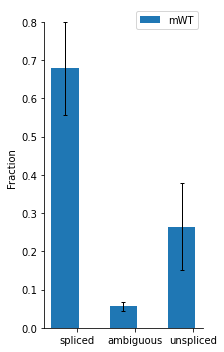

In [10]:
vlm.plot_fractions()

In [12]:
vlm.filter_cells(bool_array=vlm.initial_Ucell_size > np.percentile(vlm.initial_Ucell_size, 0.5))


IndexError: index 0 is out of bounds for axis 0 with size 0

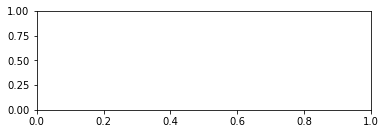

In [16]:
vlm.set_clusters(vlm.ca["Clusters"])
vlm.score_detection_levels(min_expr_counts=40, min_cells_express=30)
vlm.filter_genes(by_detection_levels=True)
vlm.score_cv_vs_mean(3000, plot=True, max_expr_avg=35)
vlm.filter_genes(by_cv_vs_mean=True)
vlm._normalize_S(relative_size=vlm.S.sum(0),
             target_size=vlm.S.sum(0).mean())
vlm._normalize_U(relative_size=vlm.U.sum(0),
             target_size=vlm.U.sum(0).mean())
vlm.perform_PCA()
vlm.knn_imputation(n_pca_dims=20, k=500, balanced=True, b_sight=3000, b_maxl=1500, n_jobs=16)
vlm.fit_gammas()
vlm.plot_phase_portraits(["Igfbpl1", "Pdgfra"])
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_velocity")
vlm.extrapolate_cell_at_t(delta_t=1.)
vlm.calculate_shift(assumption="constant_unspliced", delta_t=10)
vlm.extrapolate_cell_at_t(delta_t=1.)


IndexError: index 0 is out of bounds for axis 0 with size 0

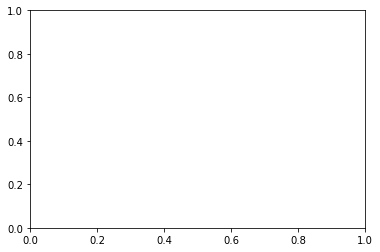

In [28]:
vlm.plot_phase_portraits(["ENSMUST00000148644"])

In [24]:
vlm.gene_info()

AttributeError: 'VelocytoLoom' object has no attribute 'gene_info'